In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [6]:
train_dir = r"E:\Cnn_ Brain_Tumor Dataset\Training"
test_dir = r"E:\Cnn_ Brain_Tumor Dataset\Testing"


In [7]:
#  preprocessing 
img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 2870 images belonging to 4 classes.


In [9]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8686440677966102), 1: np.float64(0.8728710462287105), 2: np.float64(1.8164556962025316), 3: np.float64(0.8675937122128174)}


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 394 images belonging to 4 classes.


In [12]:
#  model building
model = Sequential()

In [13]:
#  layer 1 convolution + pooling 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

C:\Users\indan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#  layer 2 deeper convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [15]:
#  layer 3 more deeper 
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [16]:
# layer 4 flatten layer 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [17]:
#   model compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [30]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.8557 - loss: 0.3413 - val_accuracy: 0.5635 - val_loss: 5.9660
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.8617 - loss: 0.3126 - val_accuracy: 0.5888 - val_loss: 4.6285
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.8714 - loss: 0.2923 - val_accuracy: 0.6548 - val_loss: 5.2689
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.8700 - loss: 0.2981 - val_accuracy: 0.5863 - val_loss: 4.8245
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.8794 - loss: 0.2827 - val_accuracy: 0.6675 - val_loss: 4.9798
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.8735 - loss: 0.2918 - val_accuracy: 0.6827 - val_loss: 4.7570
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 499s 6s/step - accuracy: 0.8770 - loss: 0.2818 - val_accuracy: 0.6015 - val_loss: 5.3653


In [31]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5888 - loss: 4.6285
Test Accuracy: 0.5888324975967407


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
prediction = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [34]:
y_pred = np.argmax(prediction, axis=1)
y_true = test_generator.classes

In [35]:
class_labels = list(test_generator.class_indices.keys())

In [36]:
cm = confusion_matrix(y_true, y_pred)

In [37]:
cm

array([[ 22,  12,  57,   9],
       [  5,  43,  57,  10],
       [  1,   0, 100,   4],
       [  7,   0,   0,  67]])

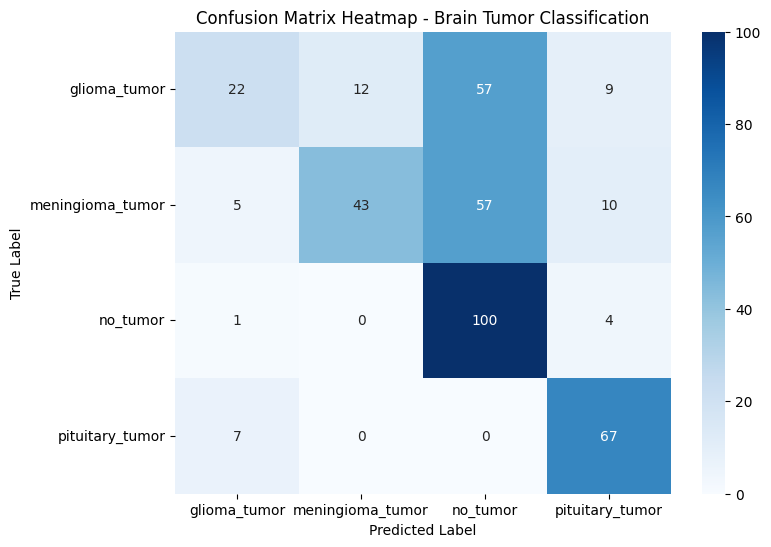

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Brain Tumor Classification")
plt.show()


In [39]:
print(classification_report(
    y_true,
    y_pred,
    target_names=test_generator.class_indices.keys()
))

                  precision    recall  f1-score   support

    glioma_tumor       0.63      0.22      0.33       100
meningioma_tumor       0.78      0.37      0.51       115
        no_tumor       0.47      0.95      0.63       105
 pituitary_tumor       0.74      0.91      0.82        74

        accuracy                           0.59       394
       macro avg       0.66      0.61      0.57       394
    weighted avg       0.65      0.59      0.55       394

